In [1]:
!pip install matplotlib pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 9.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 9.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 13.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 7.3 MB/s eta 0:00:00


Donnees chargees depuis HDFS avec succes!

Nombre de lignes: 2

Colonnes: ['window', 'avg_temp_c', 'alert_count']

Apercu des donnees:
                                              window  avg_temp_c  alert_count
0  Row(start=Timestamp('2026-01-22 14:45:00'), en...        -1.0           17
1  Row(start=Timestamp('2026-01-22 14:30:00'), en...        -1.0           28

Statistiques descriptives:
       avg_temp_c  alert_count
count         2.0     2.000000
mean         -1.0    22.500000
std           0.0     7.778175
min          -1.0    17.000000
25%          -1.0    19.750000
50%          -1.0    22.500000
75%          -1.0    25.250000
max          -1.0    28.000000


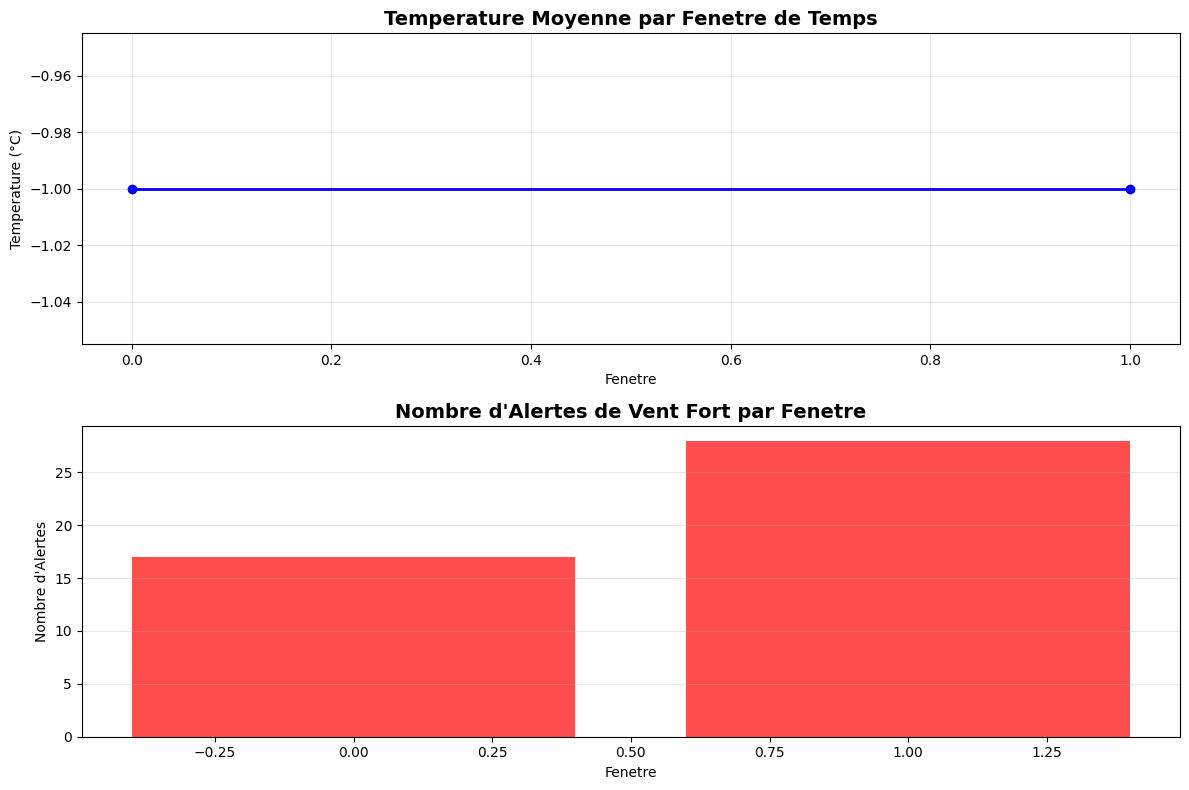


Fenetres temporelles:
Fenetre 1: Row(start=Timestamp('2026-01-22 14:45:00'), end=Timestamp('2026-01-22 14:46:00'))
Fenetre 2: Row(start=Timestamp('2026-01-22 14:30:00'), end=Timestamp('2026-01-22 14:31:00'))


In [3]:
import pandas as pd
from hdfs import InsecureClient
import matplotlib.pyplot as plt
from io import StringIO

# Configuration HDFS
hdfs_url = "http://namenode:9870"
hdfs_path = "/user/jovyan/weather/aggregated_data.csv"

# Créer le client HDFS
client = InsecureClient(hdfs_url, user='jovyan')

# Lire le fichier CSV depuis HDFS
try:
    with client.read(hdfs_path, encoding='utf-8') as reader:
        csv_content = reader.read()
    
    # Convertir en DataFrame pandas
    df = pd.read_csv(StringIO(csv_content))
    
    print("Donnees chargees depuis HDFS avec succes!")
    print(f"\nNombre de lignes: {len(df)}")
    print(f"\nColonnes: {list(df.columns)}")
    print("\n" + "="*60)
    print("Apercu des donnees:")
    print("="*60)
    print(df)
    
    # Statistiques descriptives
    print("\n" + "="*60)
    print("Statistiques descriptives:")
    print("="*60)
    print(df.describe())
    
    # Visualisations
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    # Graphique 1: Temperature moyenne par fenetre
    axes[0].plot(range(len(df)), df['avg_temp_c'], marker='o', color='blue', linewidth=2)
    axes[0].set_title('Temperature Moyenne par Fenetre de Temps', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Fenetre')
    axes[0].set_ylabel('Temperature (°C)')
    axes[0].grid(True, alpha=0.3)
    
    # Graphique 2: Nombre d'alertes par fenetre
    axes[1].bar(range(len(df)), df['alert_count'], color='red', alpha=0.7)
    axes[1].set_title('Nombre d\'Alertes de Vent Fort par Fenetre', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Fenetre')
    axes[1].set_ylabel('Nombre d\'Alertes')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Afficher les fenetres temporelles si disponibles
    if 'window' in df.columns:
        print("\n" + "="*60)
        print("Fenetres temporelles:")
        print("="*60)
        for idx, row in df.iterrows():
            print(f"Fenetre {idx+1}: {row['window']}")
    
except Exception as e:
    print(f"Erreur lors de la lecture des donnees HDFS: {e}")